<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/DeepLearning_CV1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import sys
import tensorflow as tf
import numpy as np

In [34]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


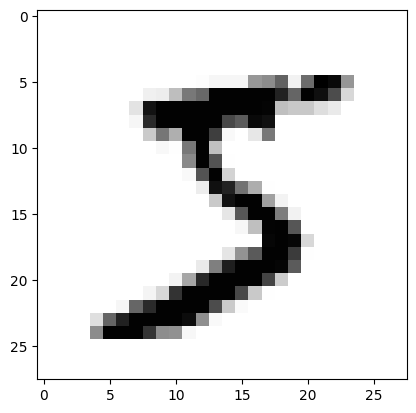

In [35]:
# MNIST 데이터를 시각화하기
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [36]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


MLP(Multi Layer Perceptron)의 입력 데이터는 기본적으로 벡터 형태입니다.
X_train은 28 x 28 크기의 MNIST 데이터 60,000개가 모여 있는 배열이기 때문에, 각각의 데이터를 (28, 28) 크기의 행렬(2차원)에서 길이가 28x28=784인 벡터(1차원)로 변형시켜야 합니다. X_test에 포함된 데이터도 reshape() 함수를 사용하여 크기를 바꿔줍시다.






In [37]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [38]:
# Q. reshape한 X_train과 X_test의 shape을 다시 확인해 보세요.
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


label의 경우 현재 0~9의 정수 값을 가지고 있습니다.
이 값들을 분류 문제에 맞게 one-hot vector로 만들어줍시다. Y_train, Y_test의 shape을 다시 보면 길이가 10인 벡터 60,000개(test는 10,000개)가 묶인 형태로 바뀐 것을 확인할 수 있습니다.

In [39]:
# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [40]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


본격적으로 MLP 모델을 만들어봅시다. 모델을 만드는 여러 가지 방법이 있지만 여기서는 Functional API로 만들어 봅시다.

이번에 구현할 모델은 input layer와 두 개의 hidden layer, 그리고 output layer로 구성되어 있습니다.
특히 output layer는 특별한 task를 수행하는데, 이 경우에는 10개의 class를 분류 (multi-class classification)하는 것입니다. 만약 output layer의 perceptron이 회귀 문제에서와 같이 실수 출력 값을 가진다면 수행하고자 하는 분류 task에 적절하지 않습니다. 왜냐 하면 분류 문제에서 label 값은 one-hot vector로 인코딩되고, 이것은 특정 클래스에 속할 확률이 1이라고 해석될 수 있기 때문입니다. 그러므로 10개의 perceptron에서 나온 출력을 확률 값으로 만들기 위해 활성화 함수로 softmax를 사용해야 합니다.

In [41]:
# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 3
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 4

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1195018 (4.56 MB)
Trainable params: 1195018 (

In [42]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [43]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30
48/48 [==============================] - 9s 147ms/step - loss: 8.4691 - categorical_accuracy: 0.7233 - val_loss: 0.3504 - val_categorical_accuracy: 0.9105
Epoch 2/30
48/48 [==============================] - 8s 172ms/step - loss: 0.2548 - categorical_accuracy: 0.9270 - val_loss: 0.2375 - val_categorical_accuracy: 0.9358
Epoch 3/30
48/48 [==============================] - 7s 139ms/step - loss: 0.1440 - categorical_accuracy: 0.9577 - val_loss: 0.1975 - val_categorical_accuracy: 0.9461
Epoch 4/30
48/48 [==============================] - 8s 174ms/step - loss: 0.0854 - categorical_accuracy: 0.9760 - val_loss: 0.1884 - val_categorical_accuracy: 0.9488
Epoch 5/30
48/48 [==============================] - 7s 139ms/step - loss: 0.0522 - categorical_accuracy: 0.9857 - val_loss: 0.1796 - val_categorical_accuracy: 0.9540
Epoch 6/30
48/48 [==============================] - 8s 175ms/step - loss: 0.0297 - categorical_accuracy: 0.9932 - val_loss: 0.1739 - val_categorical_accuracy: 0.9563
Epoc

In [46]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[8.469109535217285, 0.25477609038352966, 0.14404696226119995, 0.0853719562292099, 0.0521961972117424, 0.0297431331127882, 0.016590537503361702, 0.00937130767852068, 0.0054360986687242985, 0.003537963144481182, 0.002502073999494314, 0.0018799917306751013, 0.001478457823395729, 0.0011994615197181702, 0.0010016318410634995, 0.0008548811310902238, 0.0007326269405893981, 0.0006407011533156037, 0.0005603546742349863, 0.0004951708251610398, 0.00044051004806533456, 0.0003940981114283204, 0.00035516859497874975, 0.00032120203832164407, 0.00029056568746455014, 0.00026563333813101053, 0.00024285145627800375, 0.00022267893655225635, 0.00020456433412618935, 0.00018848896434064955]


In [47]:
# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

[0.3503771424293518, 0.2374558299779892, 0.19746698439121246, 0.18837964534759521, 0.17961588501930237, 0.17390252649784088, 0.1780814230442047, 0.17619942128658295, 0.17857737839221954, 0.18180252611637115, 0.18399393558502197, 0.1871172934770584, 0.18943585455417633, 0.1902880072593689, 0.193231999874115, 0.19425445795059204, 0.1963813751935959, 0.19746416807174683, 0.19893363118171692, 0.20063215494155884, 0.2026379555463791, 0.20361344516277313, 0.20417416095733643, 0.205922469496727, 0.2070101946592331, 0.20819148421287537, 0.20918552577495575, 0.21013639867305756, 0.21119728684425354, 0.2128133475780487]


In [48]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.1938 - categorical_accuracy: 0.9645

 Test Accuracy: 0.9645


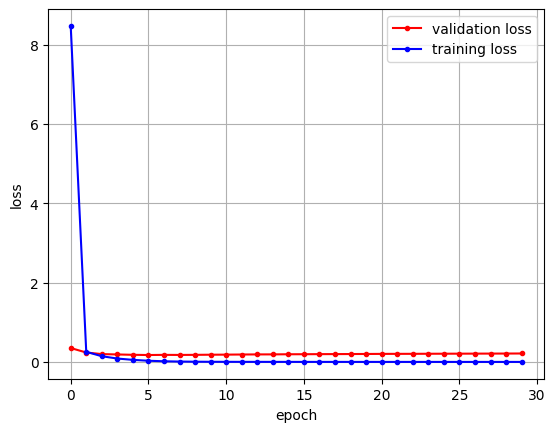

In [49]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

MLP 모델의 한계를 코드로 확인해 보겠습니다. 원본 데이터를 살짝 변형했을 때 MLP 구조가 이미지를 잘 인식하는지 실펴 보겠습니다.

원본 데이터를 변형해서 MLP 구조의 성능 테스트하기
이번 스텝에서 사용할 OpenCV 라이브러리와 MNIST 데이터를 불러옵시다. 참고로 OpenCV 라이브러리는 이미지 데이터를 다루는 데에 매우 효과적인 도구들을 갖추고 있는 모듈입니다.

In [50]:
# OpenCV 모듈 불러오기
import cv2

In [51]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


이번에는 MNIST 데이터에 장난을 조금 쳐보겠습니다.
OpenCV의 함수들을 이용해서 MNIST 이미지에 회전 변환과 이동 변환(선형 변환)을 적용합니다.

선형 변환을 위해서 변환 매트릭스를 먼저 구하고, 이미지에 변환 매트릭스를 적용해 봅시다. 즉 원본 이미지에 선형 변환 매트릭스를 곱하여 원본 이미지를 변환하는 것입니다.

In [52]:
# 이미지 회전 변환 메트릭스 구하기
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

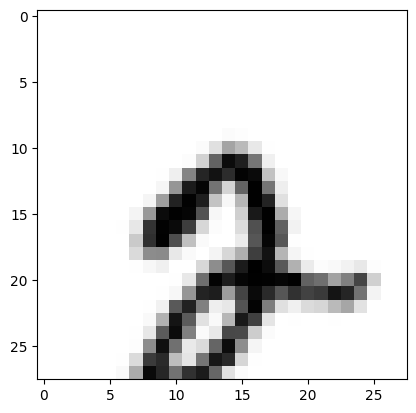

In [53]:
plt.imshow(test_image, cmap='Greys')

In [54]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [55]:
Y_prediction = model.predict(test_image_reshape)

1/1 [==============================] - 0s 95ms/step


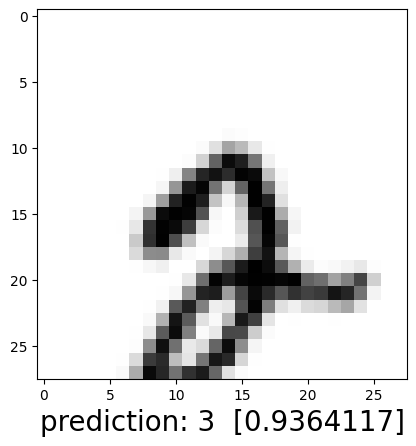

In [56]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()

분명히 숫자 2를 나타낸 이미지였지만 간단한 변환을 적용했더니 모델은 데이터를 다른 숫자로 잘못 인식했습니다. 즉 MLP로 학습한 모델은 이미지 분류기로서는 robust classifier가 아니라는 것을 알 수 있습니다. MLP를 이용해서 이미지를 분류하는 데에는 뭔가 문제가 있는 것 같습니다.

분명히 이전에 학습한 결과는 test loss가 매우 낮았으므로 분류 성능이 좋아야 하는데, 왜 이런 결과를 보이는 걸까요?